# Linear Discriminant Analysis (LDA)

**Objective**:
 demonstrate how LDA works.

**Assumptions**
- all features are normal distributed.
- all features are uncorrelated

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

### Cenario 1 - LDA with 1 normal distribuited feature

             x         fx  y
618  11.550282  12.845111  1
151  10.639439  12.125811  1
797  17.648217  16.932204  1
706  10.821780   9.138961  0
156  21.302395  21.525025  1


<AxesSubplot:xlabel='fx', ylabel='Count'>

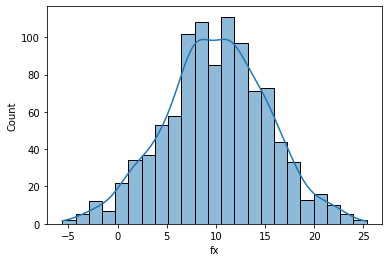

In [230]:
#feature
mean, std = 10, 5
x = np.random.normal(mean, std, 1000)

#class
#fx = b0 + b1 * x1 + error
error = np.random.normal(0, 1, 1000)
fx = x + error

y = [1 if i >= mean else 0 for i in fx]

#data with X an y
data = pd.DataFrame({'x':x, 'fx': fx,'y':y})
print(data.sample(5))

sns.histplot(data=data, x='fx', kde=True)

In [231]:
#LDA
#step 1: separate the sample by class
sample_class1 = data.loc[data['y'] == 1, 'fx']
sample_class0 = data.loc[data['y'] == 0, 'fx']


#step 2: calculate the means and probability of a random element belong to each class
mean_class1 = sample_class1.mean()
print(mean_class1)

mean_class0 = sample_class0.mean()
print(mean_class0)

prob_class1 = len(sample_class1)/len(data)
print(prob_class1)

prob_class0 = 1 - prob_class1
print(prob_class0)


#step 3: calculate std as a weighted average of sample variance for each class
sample_lda = 1/(len(data) - len(set(y))) * (sum((sample_class1 - mean_class1) ** 2) + sum((sample_class0 - mean_class0) ** 2))
print(sample_lda)


#step 4: LDA classifier
data['discriminant_fx_class1'] = data['fx'] * mean_class1/(sample_lda**2) - (mean_class1**2)/(2*(sample_lda**2)) + np.log(prob_class1)
data['discriminant_fx_class0'] = data['fx'] * mean_class0/(sample_lda**2) - (mean_class0**2)/(2*(sample_lda**2)) + np.log(prob_class0)

14.119746922876594
5.792876569093053
0.511
0.489
9.838629534012714


In [232]:
#comparing results
data['prediction_lda'] = np.where(data['discriminant_fx_class1'] > data['discriminant_fx_class0'], 1, 0)

print(confusion_matrix(data['y'], data['prediction_lda']))
print(accuracy_score(data['y'], data['prediction_lda']))
print(precision_score(data['y'], data['prediction_lda']))
print(recall_score(data['y'], data['prediction_lda']))

[[456  33]
 [  0 511]]
0.967
0.9393382352941176
1.0


<AxesSubplot:xlabel='fx', ylabel='discriminant_fx_class1'>

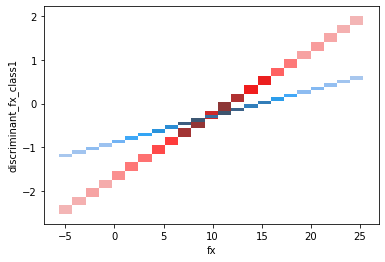

In [233]:
#graphing the probabilty
sns.histplot(data=data, x='fx', y='discriminant_fx_class1', kde=True, color='red')
sns.histplot(data=data, x='fx', y='discriminant_fx_class0', kde=True)

**Conclusion**: the predictions of LDA displayed accuracy higher than 90% in most of the executions. As we can see in the graph, each line is the probability calculated by the algorithm for every element to belong to each class, and so the prediction is based on wich line is higher. 

### Cenario 2 - LDA with 3 normal distributed and uncorrelated features

            xA         xB        xC        fx  y
156  11.416345  -6.849755 -8.534926 -3.968336  0
333  17.677522 -12.686706  0.927834  5.918651  1
472  -0.130407  -0.979564 -4.038108 -5.148079  0
876  13.626135  -5.514062 -1.797078  6.314994  1
424   8.520969  -7.315336  1.477620  2.683253  1


<AxesSubplot:xlabel='value', ylabel='Count'>

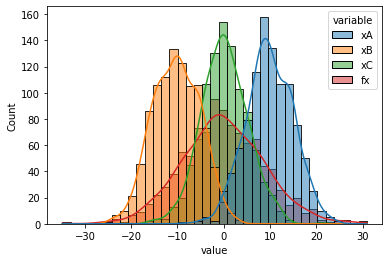

In [234]:
#feature A
meanA, stdA = 10, 5
xA = np.random.normal(meanA, stdA, 1000)


#feature B
meanB, stdB = -10, 5
xB = np.random.normal(meanB, stdB, 1000)


#feature C
meanC, stdC = 0, 5
xC = np.random.normal(meanC, stdC, 1000)

fx = xA + xB + xC

y = [1 if i >= fx.mean() else 0 for i in fx]
#y = [1 if i >= (meanA + meanB + meanC) else 0 for i in fx]

#data with X an y
data = pd.DataFrame({'xA':xA, 'xB':xB, 'xC':xC, 'fx': fx, 'y':y})
print(data.sample(5))

sns.histplot(data=pd.melt(data, id_vars=['y'], value_vars=['xA', 'xB', 'xC', 'fx']), x='value', hue='variable', kde=True)

In [235]:
matrix_mean = np.array(sample_class1.mean())

xlinha = np.array(X.loc[0])
cov = np.linalg.inv(np.array(X.cov()))

matrix_mean
linha_minus_mean = xlinha - matrix_mean
print(linha_minus_mean.reshape(1,3))
print(linha_minus_mean.reshape(1,3).shape)
print(cov)
print(cov.shape)
print(linha_minus_mean.reshape(3, 1))
print(linha_minus_mean.reshape(3, 1).shape)

lg_prob_1 = -0.5 * np.matmul(np.matmul(linha_minus_mean.T, cov), linha_minus_mean.reshape(3,1))[0] + np.log(prob_class1)
print(lg_prob_1)

[[ -1.40262402 -26.11808695 -19.79591015]]
(1, 3)
[[4.10042129e-02 1.86971145e-05 7.78063299e-04]
 [1.86971145e-05 3.98060488e-02 2.40293915e-03]
 [7.78063299e-04 2.40293915e-03 4.09173846e-02]]
(3, 3)
[[ -1.40262402]
 [-26.11808695]
 [-19.79591015]]
(3, 1)
-23.570653772384755


In [236]:
matrix_mean = np.array(sample_class0.mean())

xlinha = np.array(X.loc[0])
cov = np.linalg.inv(np.array(X.cov()))

matrix_mean
linha_minus_mean = xlinha - matrix_mean
print(linha_minus_mean.reshape(1,3))
print(linha_minus_mean.reshape(1,3).shape)
print(cov)
print(cov.shape)
print(linha_minus_mean.reshape(3, 1))
print(linha_minus_mean.reshape(3, 1).shape)

lg_prob_0 = -0.5 * np.matmul(np.matmul(linha_minus_mean.T, cov), linha_minus_mean.reshape(3,1))[0] + np.log(prob_class0)
print(lg_prob_0)

[[  6.92424633 -17.79121659 -11.46903979]]
(1, 3)
[[4.10042129e-02 1.86971145e-05 7.78063299e-04]
 [1.86971145e-05 3.98060488e-02 2.40293915e-03]
 [7.78063299e-04 2.40293915e-03 4.09173846e-02]]
(3, 3)
[[  6.92424633]
 [-17.79121659]
 [-11.46903979]]
(3, 1)
-11.11555834711139


In [237]:
xlinha = np.array(X.loc[1])
cov = np.array(X.cov())

matrix_mean
linha_minus_mean = xlinha - matrix_mean
print(linha_minus_mean.reshape(1,3))
print(linha_minus_mean.reshape(1,3).shape)
print(cov)
print(cov.shape)
print(linha_minus_mean.reshape(3, 1))
print(linha_minus_mean.reshape(3, 1).shape)
np.matmul(np.matmul(linha_minus_mean.T, cov), linha_minus_mean.reshape(3,1))
#linha_minus_mean.reshape(3, 1)

[[  2.77017327 -10.16518509 -11.97094859]]
(1, 3)
[[ 2.43965517e+01  1.66042623e-02 -4.64887010e-01]
 [ 1.66042623e-02  2.52111976e+01 -1.48088383e+00]
 [-4.64887010e-01 -1.48088383e+00  2.45352971e+01]]
(3, 3)
[[  2.77017327]
 [-10.16518509]
 [-11.97094859]]
(3, 1)


array([5977.79963795])

In [238]:
xlinha = np.array(X.loc[1:2])
cov = np.array(X.cov())
print(xlinha)
print(matrix_mean)
matrix_mean
linha_minus_mean = xlinha - matrix_mean
print(linha_minus_mean)
print(linha_minus_mean.reshape(2,3))
print(linha_minus_mean.reshape(2,3).shape)
print(cov)
print(cov.shape)
print(linha_minus_mean.reshape(3, 2))
print(linha_minus_mean.reshape(3, 2).shape)
np.matmul(np.matmul(linha_minus_mean, cov), linha_minus_mean.reshape(3,2))
#linha_minus_mean.reshape(3, 1)

[[ 8.56304984 -4.37230852 -6.17807202]
 [11.55087362 -6.04642718 -0.52051221]]
5.792876569093053
[[  2.77017327 -10.16518509 -11.97094859]
 [  5.75799705 -11.83930375  -6.31338878]]
[[  2.77017327 -10.16518509 -11.97094859]
 [  5.75799705 -11.83930375  -6.31338878]]
(2, 3)
[[ 2.43965517e+01  1.66042623e-02 -4.64887010e-01]
 [ 1.66042623e-02  2.52111976e+01 -1.48088383e+00]
 [-4.64887010e-01 -1.48088383e+00  2.45352971e+01]]
(3, 3)
[[  2.77017327 -10.16518509]
 [-11.97094859   5.75799705]
 [-11.83930375  -6.31338878]]
(3, 2)


array([[ 6371.62615401,  -347.74188014],
       [ 5514.82202546, -2235.91500972]])

In [239]:
data.head(2)

,xA,xB,xC,fx,y
0,12.671209,-16.259835,1.546867,-2.041759,0
1,7.975696,-7.653242,11.837778,12.160231,1


Problema: a fórmula do livro não é diferente da fórmula do sklearn. Adicionalmente, vi alguns artigos e vídeos no youtube que utilizam a mesma fórmula do sklearn, e não do livro.

https://www.youtube.com/watch?v=4buOoXp7AyI
https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda-math

In [240]:
#LDA
#step 1: separate the sample by class
sample_class1 = data.loc[data['y'] == 1][['xA', 'xB', 'xC']]
sample_class0 = data.loc[data['y'] == 0][['xA', 'xB', 'xC']]

#step 2: calculate the means and probability of a random element belong to each class
mean_class1 = pd.DataFrame({'mean_class1': sample_class1.mean()})
print(mean_class1)

mean_class0 = pd.DataFrame({'mean_class0': sample_class0.mean()})
print(mean_class0)

prob_class1 = len(sample_class1)/len(data)
print(prob_class1)

prob_class0 = 1 - prob_class1
print(prob_class0)


#step 3: calculate std as a weighted average of sample variance for each class
X = data[['xA', 'xB', 'xC']]
X_corr = X.corr()
X_cov = X.cov()

#step 4: LDA classifier
pred_class1 = np.matmul(np.matmul(X, np.linalg.inv(X_cov)), mean_class1) - (0.5 * np.matmul(np.matmul(mean_class1.T, np.linalg.inv(X_cov)), mean_class1)).loc['mean_class1', 0] + np.log(prob_class1)
pred_class0 = np.matmul(np.matmul(X, np.linalg.inv(X_cov)), mean_class0) - (0.5 * np.matmul(np.matmul(mean_class0.T, np.linalg.inv(X_cov)), mean_class0)).loc['mean_class0', 0] + np.log(prob_class0)

    mean_class1
xA    12.324334
xB    -7.843820
xC     2.509015
    mean_class0
xA     7.618973
xB   -12.502532
xC    -2.030514
0.488
0.512


C:\Users\Kenji\AppData\Local\Temp\ipykernel_6804\3045497164.py:26: FutureWarning:

Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.

C:\Users\Kenji\AppData\Local\Temp\ipykernel_6804\3045497164.py:27: FutureWarning:

Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(d

In [241]:
#comparing results
data['discriminant_fx_class1'] = pred_class1
data['discriminant_fx_class0'] = pred_class0
data['prediction_lda'] = np.where(data['discriminant_fx_class1'] > data['discriminant_fx_class0'], 1, 0)

print(confusion_matrix(data['y'], data['prediction_lda']))
print(accuracy_score(data['y'], data['prediction_lda']))
print(precision_score(data['y'], data['prediction_lda']))
print(recall_score(data['y'], data['prediction_lda']))

[[512   0]
 [ 22 466]]
0.978
1.0
0.9549180327868853


<AxesSubplot:xlabel='fx', ylabel='discriminant_fx_class1'>

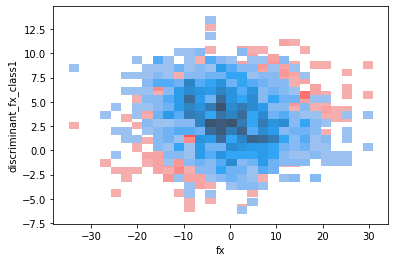

In [242]:
#graphing the probabilty (probably wrong)
sns.histplot(data=data, x='fx', y='discriminant_fx_class1', kde=True, color='red')
sns.histplot(data=data, x='fx', y='discriminant_fx_class0', kde=True)

The same visualization used with only 1 feature is not as insightful when increasing the number of features to 3..

In [243]:
import plotly.express as px

fig = px.scatter_3d(data,
                    x='xA' , y='xB', z='xC', color='prediction_lda')
fig.show()

In [244]:
#check with scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X, y)
lda.predict(X).tolist()

data['prediction_sklearn'] = lda.predict(X).tolist()
data['prob1_sklearn'] = lda.predict_log_proba(X)[:,1]
data['prob0_sklearn'] = lda.predict_log_proba(X)[:,0]


#cases of divergence (why?)
data.loc[data['prediction_lda'] != data['prediction_sklearn']]
data.head(3)

,xA,xB,xC,fx,y,discriminant_fx_class1,discriminant_fx_class0,prediction_lda,prediction_sklearn,prob1_sklearn,prob0_sklearn
0,12.671209,-16.259835,1.546867,-2.041759,0,6.501716,6.927234,0,0,-1.337611,-0.304451
1,7.975696,-7.653242,11.837778,12.160231,1,2.384379,0.283841,1,1,-0.003846,-5.562698
2,22.305231,-1.720479,4.841736,25.426488,1,6.819128,2.360765,1,1,-0.000008,-11.711853


In [245]:
lda.decision_function(X)

array([-1.03316025e+00,  5.55885241e+00,  1.17118451e+01, -5.43806020e+00,
       -3.84464829e+00, -6.51733164e+00, -7.83924165e-03, -4.43099112e+00,
       -6.77987389e+00,  1.52017637e+00,  3.38949805e-01,  2.40054731e+00,
       -3.01460914e-01,  9.81145839e-01, -1.18424618e+00,  1.57314324e+00,
        4.62714486e+00, -3.11511604e+00, -6.62466775e+00,  3.79816910e+00,
       -3.76753061e+00,  2.63643059e+00, -6.34945205e+00, -4.47626310e+00,
       -3.01323030e+00, -7.07394361e+00,  4.28557356e+00, -3.12780915e-01,
       -8.99987759e-01, -6.93472600e+00,  1.39306187e+01,  6.22356184e-01,
       -1.20290799e+00,  3.97471579e+00,  2.37678286e+00, -1.02110456e+00,
        1.61762020e+00, -3.87976569e+00,  1.90988840e+00, -6.02595382e+00,
        3.77042477e+00,  5.16693167e+00, -1.44464550e+00, -1.64959911e+00,
       -6.70075370e-01,  8.33597792e+00,  1.99153952e+00, -2.05017554e+00,
       -4.61695604e+00,  1.43925452e+00,  2.34795187e+00, -5.35735482e+00,
        1.76365342e+00,  

### Cenario 3 - LDA with 2 normal distributed and high correlated features

            xA         xB        xC         fx  y
657   6.146983   6.145898  1.083259  12.292881  1
887   2.283314   0.806628 -3.572439   3.089943  0
380  11.251603   9.990072 -3.555028  21.241675  1
712  10.115117  10.608206  7.755901  20.723323  1
368   8.511575   9.445373 -3.929293  17.956949  1


<AxesSubplot:xlabel='value', ylabel='Count'>

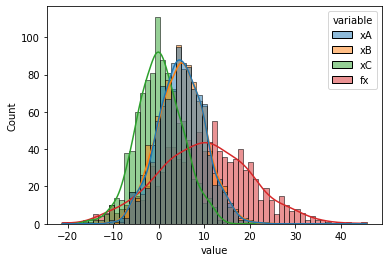

In [246]:
#feature A
meanA, stdA = 5, 5
xA = np.random.normal(meanA, stdA, 1000)


#feature B
meanB, stdB = 0, 1
xB = xA + np.random.normal(meanB, stdB, 1000)

#class
fx = xA + xB

y = [1 if i >= (meanA + meanB) else 0 for i in fx]

#data with X an y
data = pd.DataFrame({'xA':xA, 'xB':xB, 'xC':xC, 'fx': fx, 'y':y})
print(data.sample(5))

sns.histplot(data=pd.melt(data, id_vars=['y'], value_vars=['xA', 'xB', 'xC', 'fx']), x='value', hue='variable', kde=True)

### Cenario 3 - LDA with 1 non-normal distribuited feature and 1 class 

### Cenario 4 - LDA with 1 normal distribuited feature and 1 multi-class 